In [3]:
import numpy as np

import gif
import matplotlib.pyplot as plt

from pathlib import Path
import yaml
import matplotlib.ticker as ticker
import matplotlib.colors as colors

In [122]:
B_stop = 4

low = 0.5
high = 7

######################################

x_cts = np.linspace(-1,1,1000)
low_freq = np.sin(2*np.pi*low*x_cts)
high_freq = np.sin(2*np.pi*high*x_cts)

total_sig = low_freq + high_freq

ideal_filt = 2*B_stop * np.sinc(x_cts * 2 * B_stop)

analytic_result = low_freq

######################################

sampled = np.linspace(-1, 1, 100)

sampled_small = np.linspace(-0.5, 0.5, 40)

sampled_filt = 2*B_stop * np.sinc(sampled_small * 2 * B_stop)

sampled_low = np.sin(2*np.pi*low*sampled)
sampled_high = np.sin(2*np.pi*high*sampled)

sampled_total = sampled_low + sampled_high

sampled_result = np.convolve(sampled_total, sampled_filt, mode='same')

######################################

np.random.seed(10)

from core.FastGL.glpair import glpair

num_points = 100

quad_weights = np.zeros((num_points))
quad_nodes = np.zeros((num_points))

for i in range(num_points):
    _, quad_weights[i], quad_nodes[i] = glpair(num_points, i+1)


#rand_sampled = np.cumsum(np.random.uniform(0,0.04,(100))) - 1

qsampled_filt = 2*B_stop * np.sinc(quad_nodes * 2 * B_stop)

qsampled_low = np.sin(2*np.pi*low*quad_nodes)
qsampled_high = np.sin(2*np.pi*high*quad_nodes)

qsampled_total = qsampled_high + qsampled_low

qsampled_result = np.convolve(qsampled_total, qsampled_filt, mode='same')


######################################


filt_func = lambda x : 2*B_stop * np.sinc(x * 2 * B_stop)


def custom_conv(sig,filt_func,qw,qn):

    output = np.zeros_like(qn)

    for i,t in enumerate(qn):

        dfilt = filt_func(t - qn)

        output[i] = np.sum(qw * dfilt * sig)

    return output


our_way = custom_conv(qsampled_total, filt_func, quad_weights, quad_nodes)

no_weights = custom_conv(qsampled_total, filt_func, np.ones_like(quad_nodes), quad_nodes)

Text(0.5, 1.0, 'Result (Continuous)')

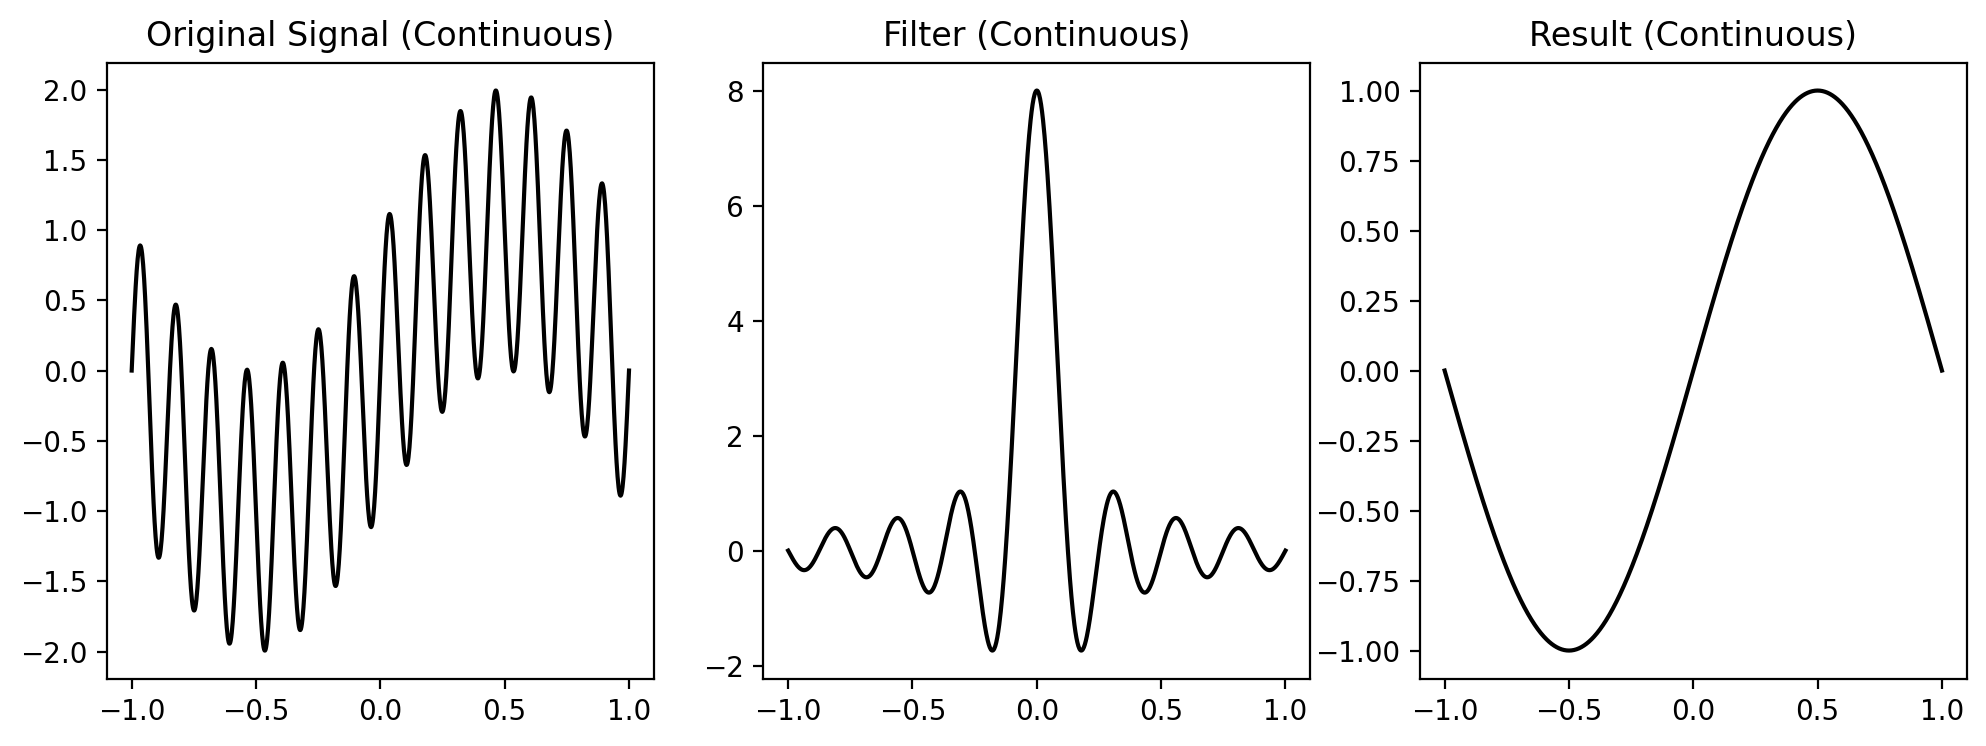

In [120]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3, figsize=(12,4), dpi=200)


ax1.plot(x_cts,total_sig, color='black')
ax1.set_title(label='Original Signal (Continuous)')

ax2.plot(x_cts,ideal_filt, color='black')
ax2.set_title(label='Filter (Continuous)')

ax3.plot(x_cts,analytic_result, color='black')
ax3.set_title(label='Result (Continuous)')

Text(0.5, 1.0, 'Result (Sampled)')

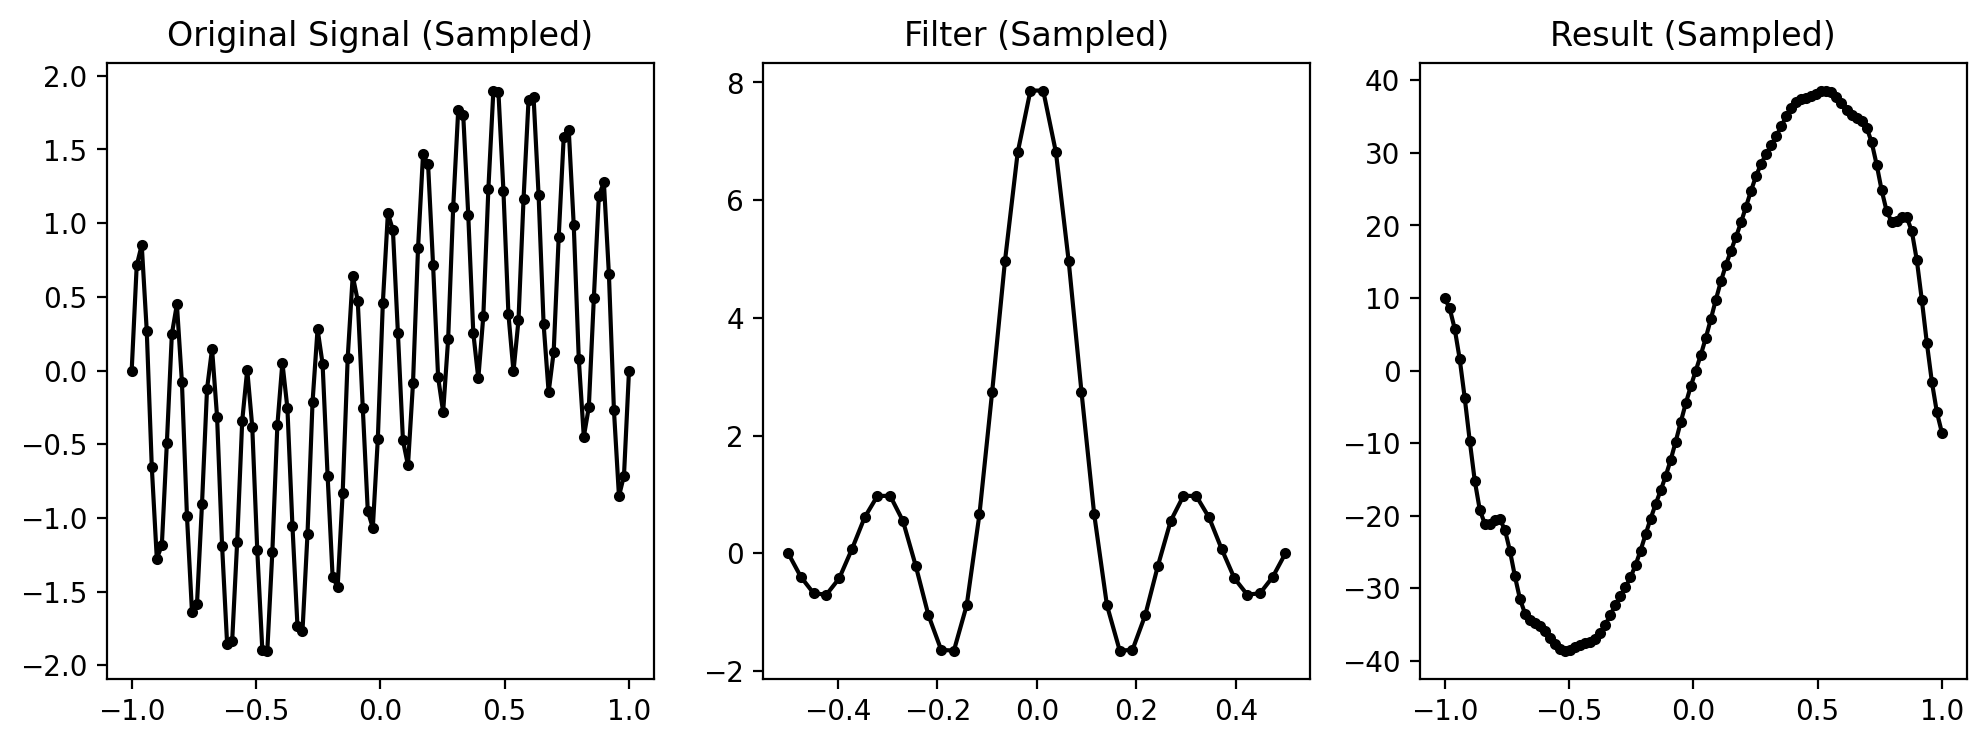

In [117]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3, figsize=(12,4), dpi=200)


ax1.plot(sampled,sampled_total, color='black', marker='.' )
ax1.set_title(label='Original Signal (Sampled)')

ax2.plot(sampled_small,sampled_filt, color='black', marker='.' )
ax2.set_title(label='Filter (Sampled)')

ax3.plot(sampled,sampled_result, color='black', marker='.' )
ax3.set_title(label='Result (Sampled)')

Text(0.5, 1.0, 'Result (Sampled)')

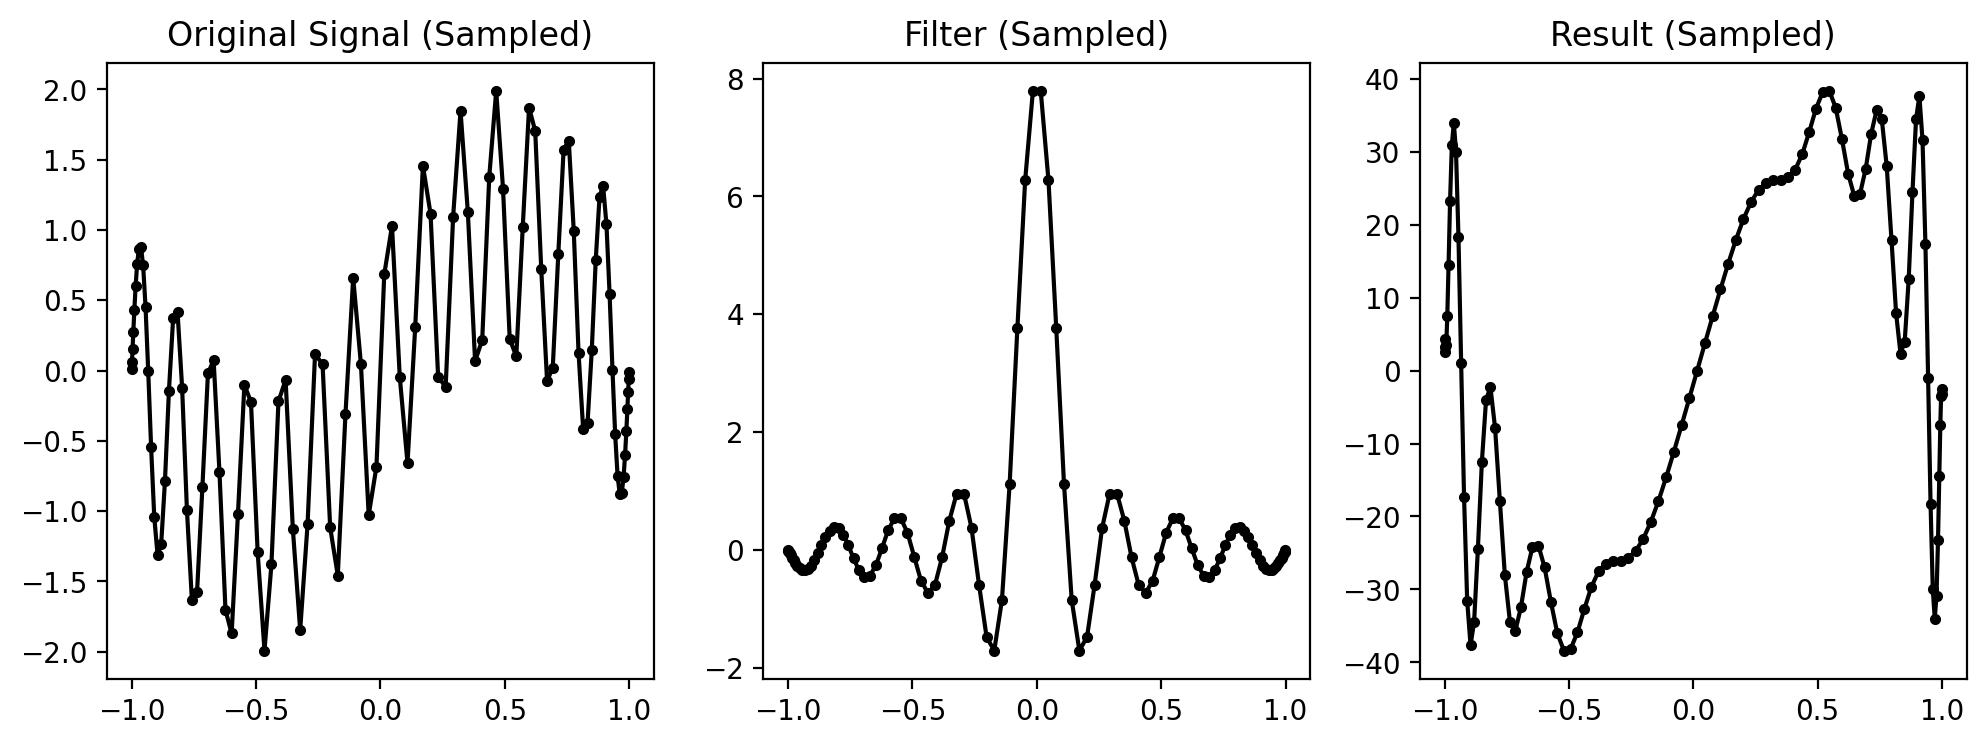

In [118]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3, figsize=(12,4), dpi=200)


ax1.plot(quad_nodes,qsampled_total, color='black', marker='.' )
ax1.set_title(label='Original Signal (Sampled)')

ax2.plot(quad_nodes,qsampled_filt, color='black', marker='.' )
ax2.set_title(label='Filter (Sampled)')

ax3.plot(quad_nodes,qsampled_result, color='black', marker='.' )
ax3.set_title(label='Result (Sampled)')

Text(0.5, 1.0, 'Result (Sampled)')

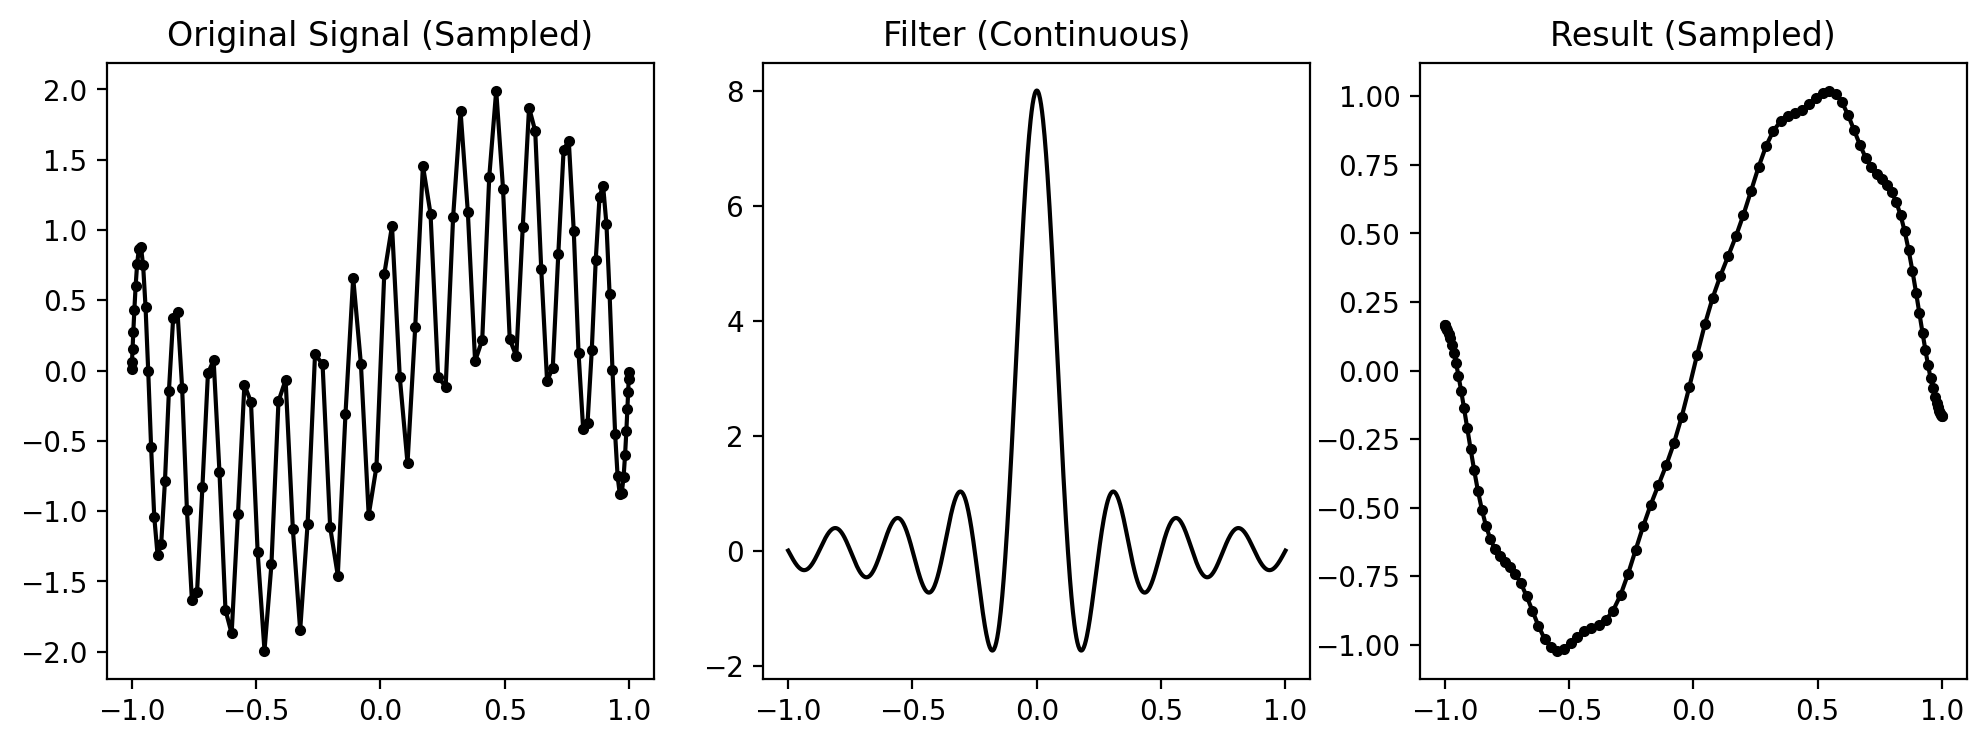

In [121]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3, figsize=(12,4), dpi=200)


ax1.plot(quad_nodes,qsampled_total, color='black', marker='.' )
ax1.set_title(label='Original Signal (Sampled)')

ax2.plot(x_cts,ideal_filt, color='black')
ax2.set_title(label='Filter (Continuous)')

ax3.plot(quad_nodes,our_way, color='black', marker='.' )
ax3.set_title(label='Result (Sampled)')

Text(0.5, 1.0, 'Result (Sampled)')

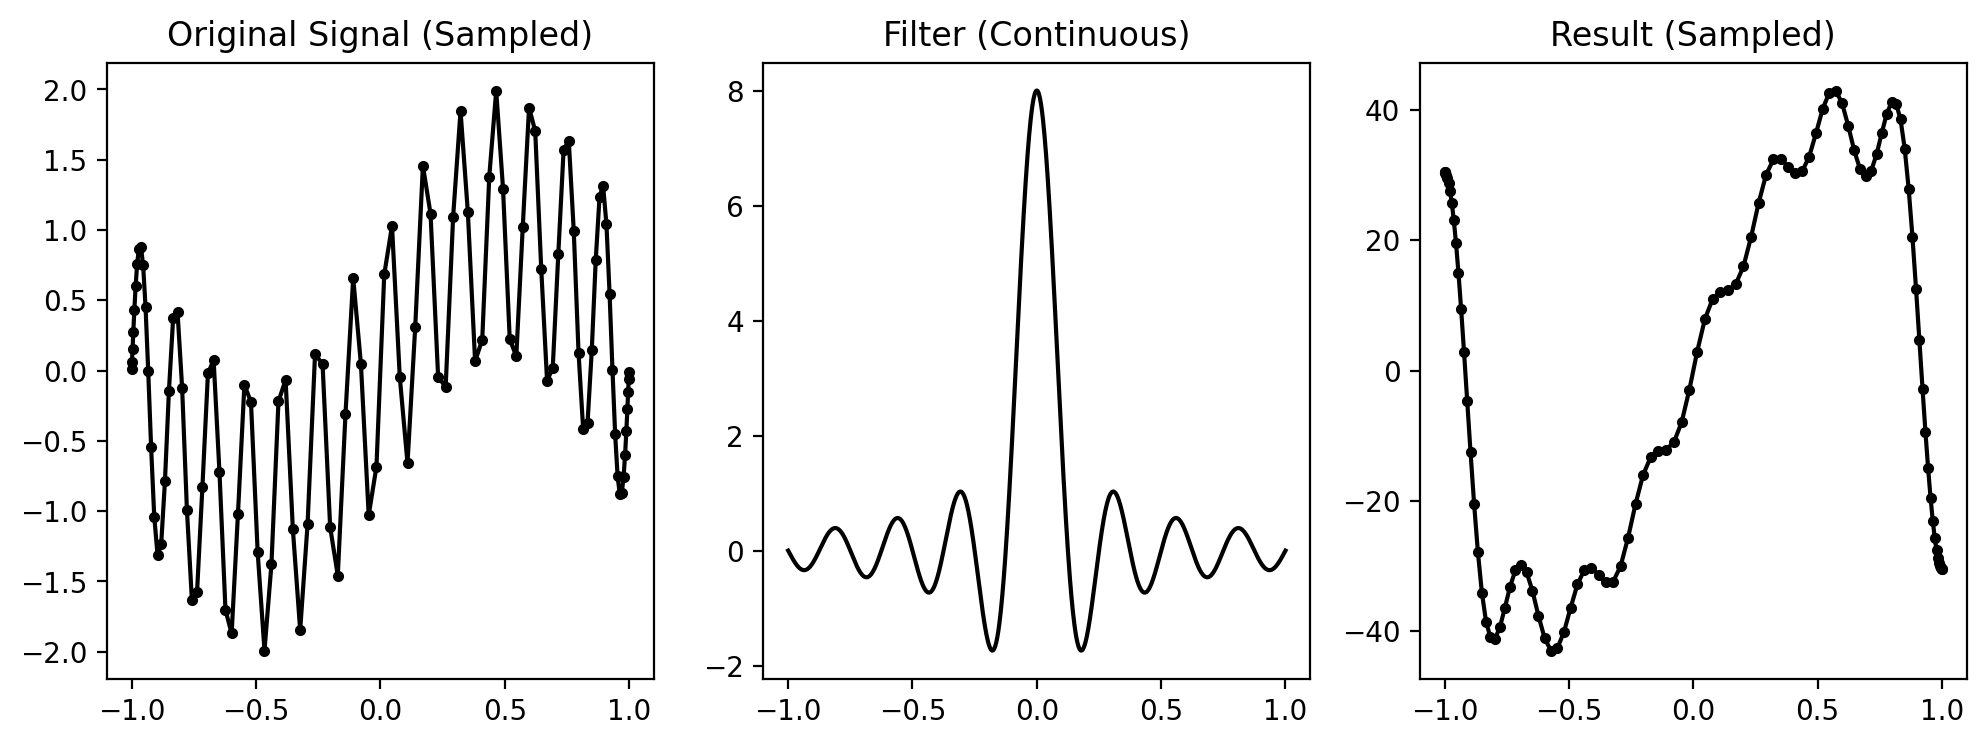

In [123]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3, figsize=(12,4), dpi=200)


ax1.plot(quad_nodes,qsampled_total, color='black', marker='.' )
ax1.set_title(label='Original Signal (Sampled)')

ax2.plot(x_cts,ideal_filt, color='black')
ax2.set_title(label='Filter (Continuous)')

ax3.plot(quad_nodes,no_weights, color='black', marker='.' )
ax3.set_title(label='Result (Sampled)')